<a href="https://colab.research.google.com/github/ms624atyale/Data_Analysis/blob/main/8_BasicStats_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###🐹🐾 **통계 함수 적용하기**
- 평균값 mean
- 중간값 median
- 최대값 maximum
- 최소값 minimum
- 표준편차 standard deviation
- 상관계수 correlation coefficient

In [ ]:
#coding utf-8

import pandas as pd
import numpy as np
df = pd.read_csv('/content/sample_data/auto-mpg.csv')
df.columns = ['mpg', 'cylinders','displacement', 'horsepoweer', 'weight', 'acceleration', 'model year', 'origin', 'name']

# Convert non-numeric values to NaN for all columns
df = df.apply(pd.to_numeric, errors='coerce')


#평균값
print(df.mean())
print('\n')
print(df['mpg'].mean())
print('\n')
print(df[['mpg','weight']].mean()) #[] square brackets 개수 주의할 것
print('\n')

#표준편차값
print(df.std())
print('\n')
print(df[['mpg','weight']].std())
print('\n')

#최대값
print(df.max())
print('\n')

#최소값
print(df.min())
print('\n')

#상관계수
print(df.corr())


mpg               23.528463
cylinders          5.448363
displacement     193.139798
horsepoweer      104.404092
weight          2969.080605
acceleration      15.577078
model year        76.025189
origin             1.574307
name                    NaN
dtype: float64


23.528463476070527


mpg         23.528463
weight    2969.080605
dtype: float64


mpg               7.820926
cylinders         1.698329
displacement    104.244898
horsepoweer      38.518732
weight          847.485218
acceleration      2.755326
model year        3.689922
origin            0.802549
name                   NaN
dtype: float64


mpg         7.820926
weight    847.485218
dtype: float64


mpg               46.6
cylinders          8.0
displacement     455.0
horsepoweer      230.0
weight          5140.0
acceleration      24.8
model year        82.0
origin             3.0
name               NaN
dtype: float64


mpg                9.0
cylinders          3.0
displacement      68.0
horsepoweer       46.0
weight        

###**Line Graph**
Ch.4: 1.1

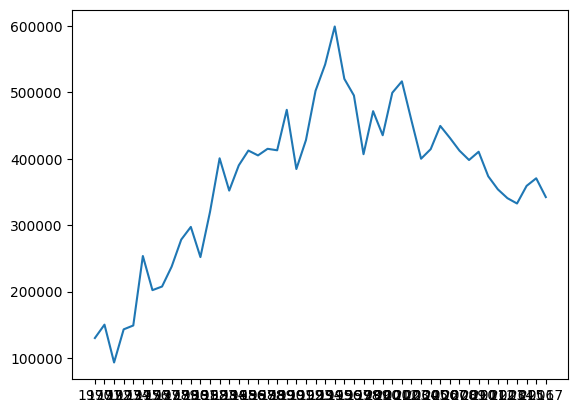

In [ ]:
#coding UTF-8

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('/content/sample_data/시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)
#df.head()

# The method is set to 'ffill', which stands for "forward fill".
#It means that missing values will be filled with the value from the previous row.
df = df.fillna(method='ffill')

# Filter data for migration from Seoul to other regions
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]

# Drop the '전출지별' column and rename the '전입자별' column to '전입지'
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename(columns={'전입자별': '전입지별'}, inplace=True)

# Set the index to '전입지별'
df_seoul.set_index('전입지별', inplace=True)

# Select data for migration from Seoul to Gyeonggi-do
sr_one = df_seoul.loc['경기도']

# Plot the data
plt.plot(sr_one.index, sr_one.values)
plt.show()

## 👀 **Annotation in Korean**

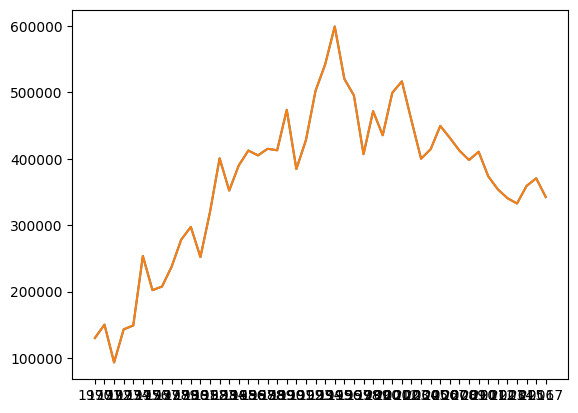

In [ ]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임 변환
df = pd.read_excel('/content/sample_data/시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)

# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 판다스 객체를 plot 함수에 입력
plt.plot(sr_one)

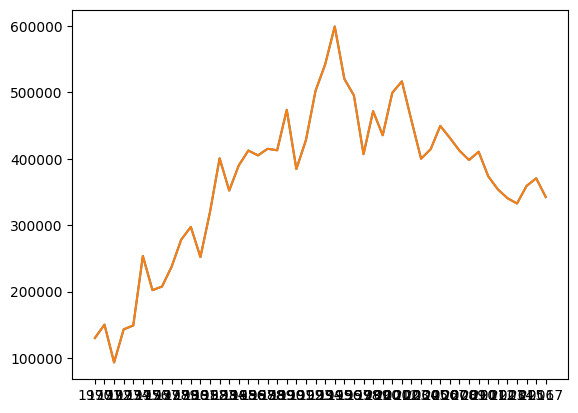

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('/content/sample_data/시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)
df = df.fillna(method='ffill')
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

sr_one = df_seoul.loc['경기도']

plt.plot(sr_one.index, sr_one.values)

plt.plot(sr_one)

###**Box Plot & Violine Graph**
p.155 설명 추가

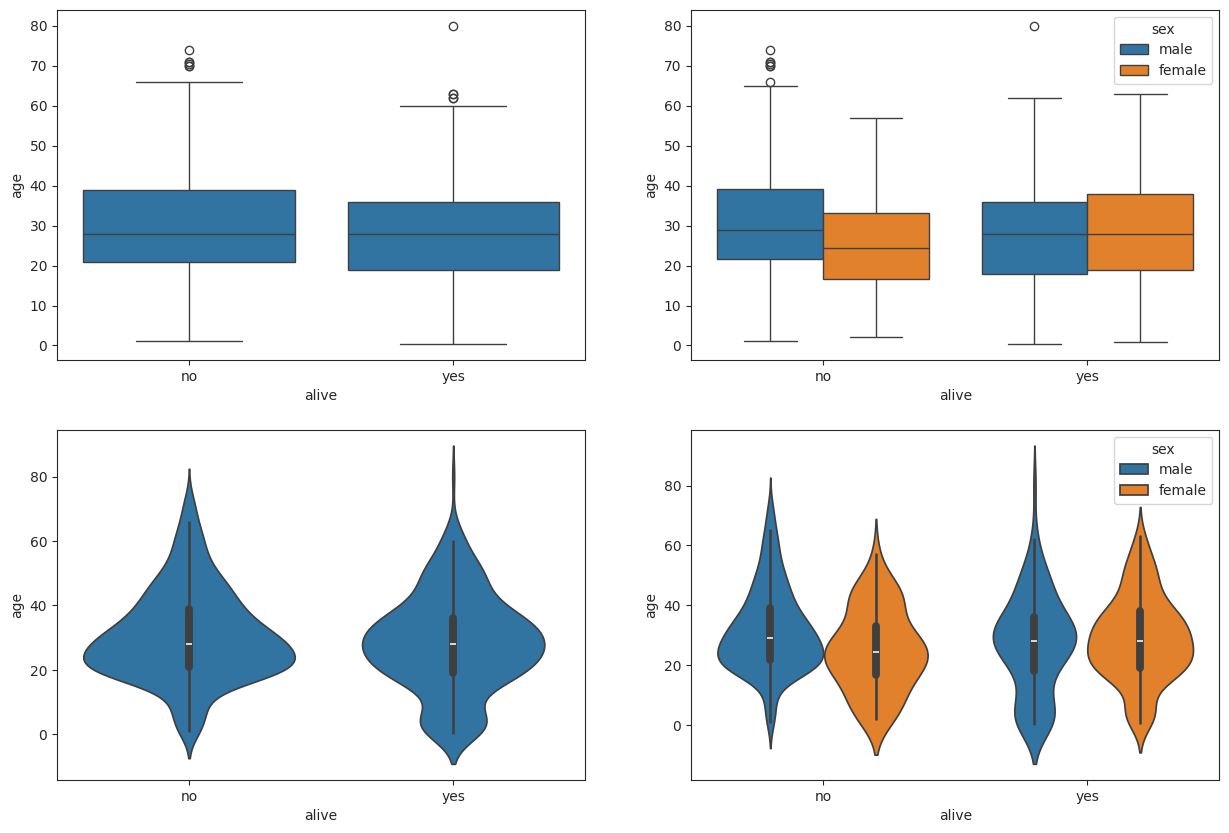

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Seaborn 제공 데이터 가지고 오기
titanic = sns.load_dataset('titanic')

#Style Theme 설정 (e.g., darkgrid, whitegrid, dark, white, ticks)
#sns.set_style('darkgrid')
#sns.set_style('whitegrid')
#sns.set_style('dark')
#sns.set_style('white')
sns.set_style('ticks')

#그래프 객체 생성 (figure에 네개의 서브플랏 생성)
# In the function of subplot(a1, a2, a3), The first two arguments 2, 2 specifies a grid layout of subplots with 2 rows and 2 columns, making a total of 4 subplots.
# The third argument 1 refers to the first subplot (top-left), 2 to the second subplot (top-right), 3 to the third subplot (bottom-left), 4 to the fourth subplot (bottom-right).
fig = plt.figure(figsize = (15, 10)) #Creates a figure object of size 15 inches by 10 inches.
ax1 = fig.add_subplot(2,2,1) #Adds the first subplot to the figure at position (2, 2, 1).
ax2 = fig.add_subplot(2,2,2) #Adds the first subplot to the figure at position (2, 2, 2).
ax3 = fig.add_subplot(2,2,3) #Adds the first subplot to the figure at position (2, 2, 3).
ax4 = fig.add_subplot(2,2,4) #Adds the first subplot to the figure at position (2, 2, 4).

#박스 플롯 - 기본값
sns.boxplot(x = 'alive', y = 'age', data=titanic, ax = ax1)

#박스 플롯 - hue 변수 추가
sns.boxplot(x = 'alive', y = 'age', hue = 'sex', data=titanic, ax = ax2)

#바이올린 그래프 - 기본값
sns.violinplot(x = 'alive', y = 'age', data=titanic, ax = ax3)

#바이올린 그래프 - hue 변수 추가
sns.violinplot (x = 'alive', y = 'age', hue = 'sex', data=titanic, ax = ax4) #When you specify a string, it is supposed to be included in the original data (e.g., 'gender' for 'sex' will result in a value error)

plt.show()


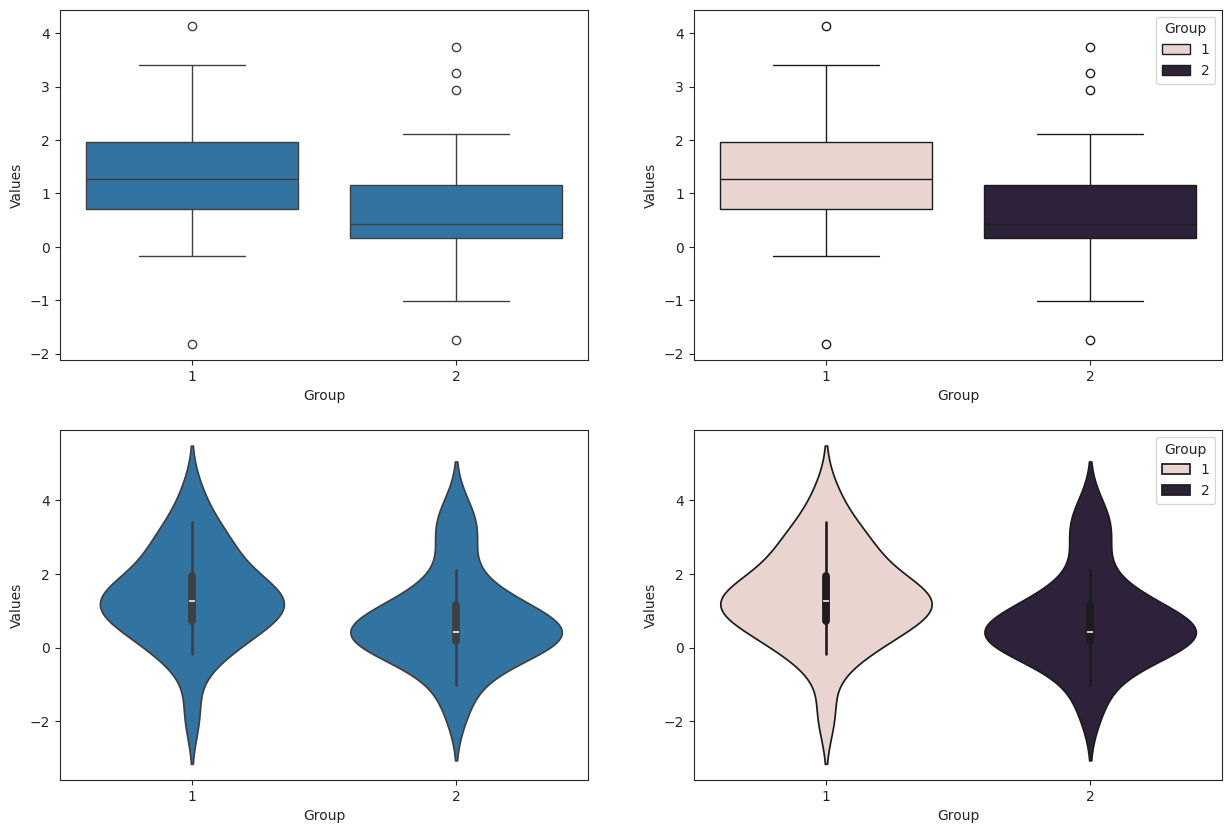

In [10]:
#@markdown 🐹🌱🌱 **Students' Activity 1️⃣**

#@markdown 🐹🌱🌱 Generate box plots and violin plots with an uploaded csv file.

#@markdown 🐹🌱🌱 Use "TwoGroupData_Base4Ttest_Independent.csv"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/sample_data/TwoGroupData_Base4Ttest_Independent.csv')

# Convert non-numeric values to NaN for all columns
df = df.apply(pd.to_numeric, errors='coerce')


#Style Theme 설정 (e.g., darkgrid, whitegrid, dark, white, ticks)
sns.set_style('ticks')

#그래프 객체 생성 (figure에 두개의 서브플랏 생성)
# In the function of subplot(a1, a2, a3), The first two arguments 2, 2 specifies a grid layout of subplots with 2 rows and 2 columns, making a total of 4 subplots.
# The third argument 1 refers to the first subplot (top-left), 2 to the second subplot (top-right), 3 to the third subplot (bottom-left), 4 to the fourth subplot (bottom-right).
fig = plt.figure(figsize = (15, 10)) #Creates a figure object of size 15 inches by 10 inches.
ax1 = fig.add_subplot(2,2,1) #Adds the first subplot to the figure at position (2, 2, 1).
ax2 = fig.add_subplot(2,2,2) #Adds the first subplot to the figure at position (2, 2, 2).
ax3 = fig.add_subplot(2,2,3) #Adds the first subplot to the figure at position (2, 2, 3).
ax4 = fig.add_subplot(2,2,4) #Adds the first subplot to the figure at position (2, 2, 4).

#Box plot - default
sns.boxplot(x = 'Group', y = 'Values', data=df, ax = ax1)

#Box plot - with hue
sns.boxplot(x = 'Group', y = 'Values', hue = 'Group', data=df, ax = ax2)

#Violin plot - default
sns.violinplot(x = 'Group', y = 'Values', data=df, ax = ax3)

#Violin plot - with hue
sns.violinplot(x = 'Group', y = 'Values', hue = 'Group', data=df, ax = ax4)

plt.show()

<ipython-input-8-86fedaa65ad1>:39: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(x = 'Group', y = 'Values', hue = 'Group', data=df, ax = ax3, palette=sns.color_palette("bright"))
<ipython-input-8-86fedaa65ad1>:54: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.violinplot(x = 'Group', y = 'Values', hue = 'Group', data=df, ax = ax7, palette=sns.color_palette("bright"))


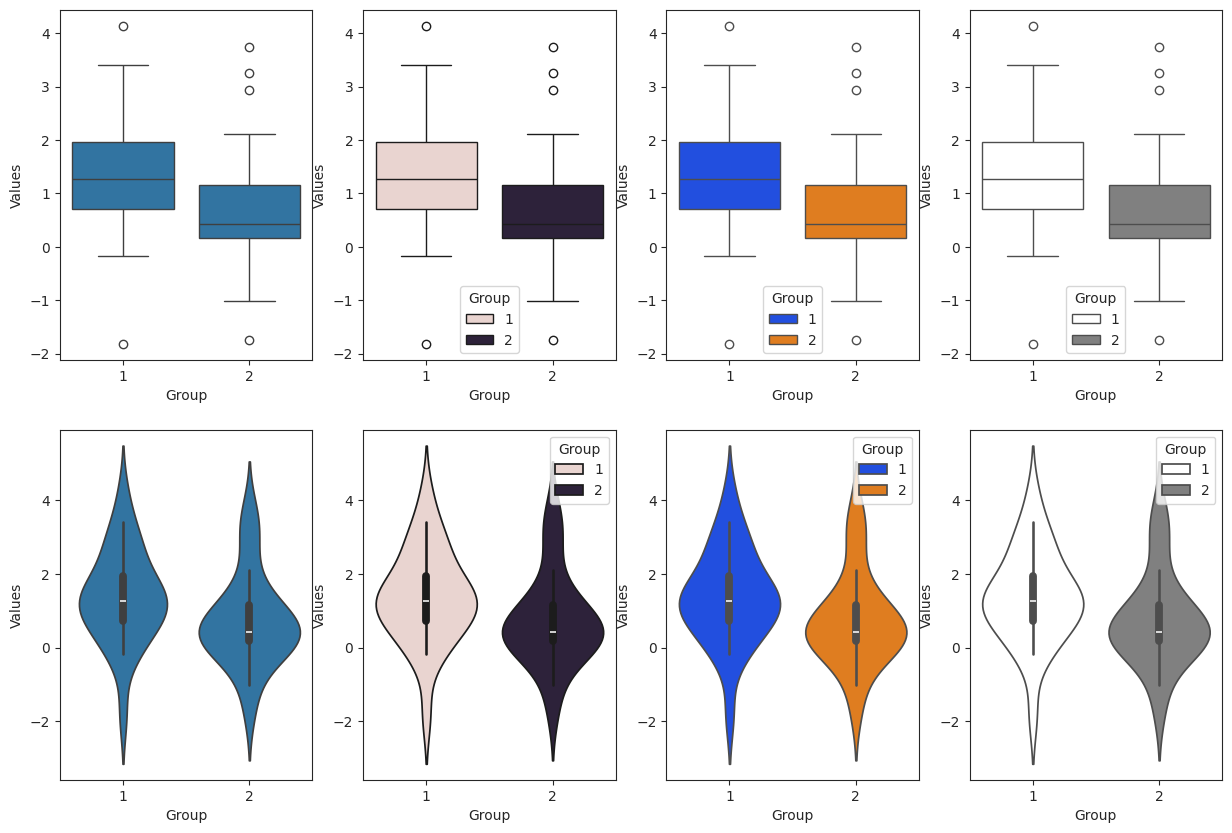

In [8]:
#@markdown 🐹🌱🌱 **Students' Activity 2️⃣**

#@markdown 🐹🌱🌱 Try to use various colors for better visualization and publication...

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/sample_data/TwoGroupData_Base4Ttest_Independent.csv')

# Convert non-numeric values to NaN for all columns
df = df.apply(pd.to_numeric, errors='coerce')


#Style Theme 설정 (e.g., darkgrid, whitegrid, dark, white, ticks)
#sns.set_style('darkgrid')
#sns.set_style('whitegrid')
#sns.set_style('dark')
#sns.set_style('white')
sns.set_style('ticks')

#그래프 객체 생성 (figure에 두개의 서브플랏 생성)
# In the function of subplot(a1, a2, a3), The first two arguments 2, 2 specifies a grid layout of subplots with 2 rows and 2 columns, making a total of 4 subplots.
# The third argument 1 refers to the first subplot (top-left), 2 to the second subplot (top-right), 3 to the third subplot (bottom-left), 4 to the fourth subplot (bottom-right).
fig = plt.figure(figsize = (15, 10)) #Creates a figure object of size 15 inches by 10 inches.
ax1 = fig.add_subplot(2,4,1) #Adds the first subplot to the figure at position (2, 2, 1).
ax2 = fig.add_subplot(2,4,2) #Adds the first subplot to the figure at position (2, 2, 2).
ax3 = fig.add_subplot(2,4,3) #Adds the first subplot to the figure at position (2, 2, 3).
ax4 = fig.add_subplot(2,4,4) #Adds the first subplot to the figure at position (2, 2, 4).
ax5 = fig.add_subplot(2,4,5) #Adds the first subplot to the figure at position (2, 2, 5).
ax6 = fig.add_subplot(2,4,6) #Adds the first subplot to the figure at position (2, 2, 6).
ax7 = fig.add_subplot(2,4,7) #Adds the first subplot to the figure at position (2, 2, 5).
ax8 = fig.add_subplot(2,4,8) #Adds the first subplot to the figure at position (2, 2, 6).

#Box plot - default
sns.boxplot(x = 'Group', y = 'Values', data=df, ax = ax1)

#Box plot - with hue
sns.boxplot(x = 'Group', y = 'Values', hue = 'Group', data=df, ax = ax2)

#Box plot - with hue and custom palette with bright colors
sns.boxplot(x = 'Group', y = 'Values', hue = 'Group', data=df, ax = ax3, palette=sns.color_palette("bright"))

# Define the custom color palette with white and gray
white_gray_palette = ['#FFFFFF', '#808080']

#Box plot - with hue and custom palette with white and gray
sns.boxplot(x = 'Group', y = 'Values', hue = 'Group', data=df, ax = ax4, palette=white_gray_palette)

#Violin plot - default
sns.violinplot(x = 'Group', y = 'Values', data=df, ax = ax5)

#Violin plot - with hue
sns.violinplot(x = 'Group', y = 'Values', hue = 'Group', data=df, ax = ax6)

#Violin plot - with hue and custom palette with bright colors
sns.violinplot(x = 'Group', y = 'Values', hue = 'Group', data=df, ax = ax7, palette=sns.color_palette("bright"))

# Define the custom color palette with white and gray (Repeated due to educational purposes)
white_gray_palette = ['#FFFFFF', '#808080']

#Violin plot - with hue and custom palette with white and gray
sns.violinplot(x = 'Group', y = 'Values', hue = 'Group', data=df, ax = ax8, palette=white_gray_palette)

plt.show()

###**Joint Graph**
* jointplot() 함수는 산점도를 기본으로 표시하고, x-y 축에 각 변수에 대한 히스토그램을 동시에 보여준다.
* 두변수의 관계와 데이터가 분산되어 있는 정도를 한눈에 파악하기 좋다.
* 아래 예시에서는 산점도를 기본값으로 하고, 회귀선 추가, 육각 산점도, 커널 밀집 그래프 순으로 조인트 그래프를 생성하여 차이를 비교한다.  

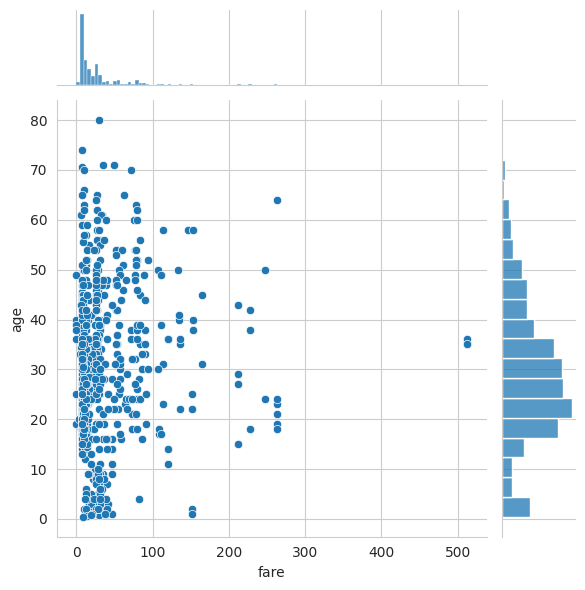

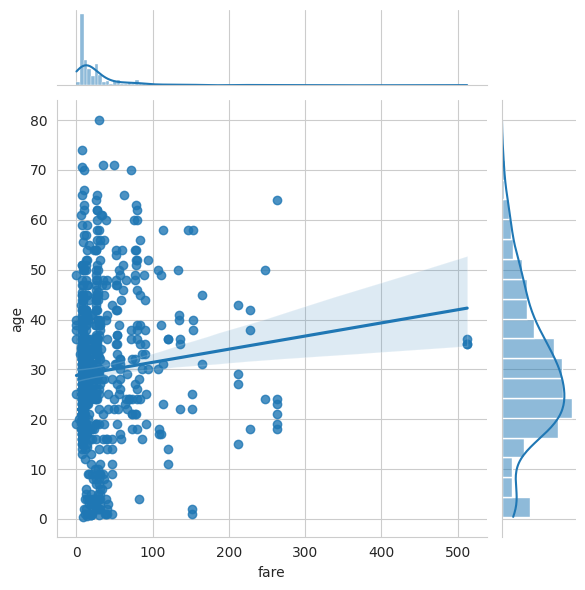

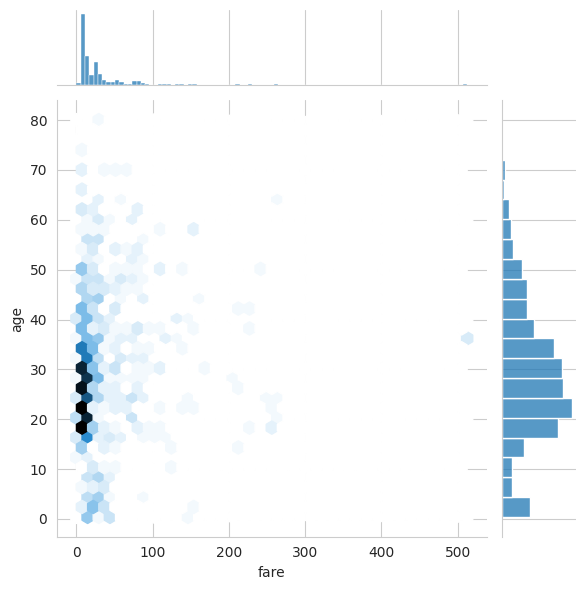

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

#스타일 테마 설정하기(e.g., darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

#조인트 그래프 - 산점도(기본값)
j1 = sns.jointplot(x = 'fare', y = 'age', data = titanic)

#joint graph - 회기선
j2 = sns.jointplot(x = 'fare', y = 'age', kind = 'reg', data = titanic)

#joint graph - 육각 그래프
j3 = sns.jointplot(x = 'fare', y = 'age', kind = 'hex', data = titanic )